# Project: Investigate a Dataset - TMDB Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>  We will analyise the TMDB data set which contains information about 10,000 movies like their ratings, revenue, and genre

### Question(s) for Analysis
> We will answer questions like :
1) what is the most common genre 
2) what genre makes the highest reveneu compared to the budget


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling
> 1) We will drop unwanted columns  
>   2) We will fix missing values  
>   3) We will drop duplicated columns  
>   4) We will simplify columns with multiple values  


In [3]:
# Take column from a dataframe and delete multiple values of that column
def del_multipleValues (col_name) :
    df[col_name] = df[col_name].str.split('|', expand=True)


In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> There are some columns with multiple values like the genre column  
> We have alot of columns that we won't need  in our analysis like the id , tmdb_id, and cast.
So we will remove them to make the data set more cleaner.
> We will use the budget_jdt and revenue_jdt instead of budget and revenue columns because they are more standard .

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> As we can see there is some missing values so we will fill it with the mean and for string columns we will just neglet them



### Data Cleaning

 

In [6]:
# Drop unwanted columns
df.drop( ['id', 'imdb_id', 'keywords', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'overview', 'production_companies', 'release_date'], axis=1, inplace=True)


In [7]:
df.head()

,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


> We will use the budget_adj and revenue_adj as they are more standard

In [8]:
df.drop(['budget', 'revenue'], axis=1, inplace=True)

In [9]:
df.head()

,popularity,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


> For simplicity we will just take the first genre

In [10]:
del_multipleValues ('genres') 


In [11]:
df.head()

,popularity,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,124,Action,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,120,Action,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,119,Adventure,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,136,Action,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,137,Action,2947,7.3,2015,1.747999e+08,1.385749e+09


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
popularity      10866 non-null float64
runtime         10866 non-null int64
genres          10843 non-null object
vote_count      10866 non-null int64
vote_average    10866 non-null float64
release_year    10866 non-null int64
budget_adj      10866 non-null float64
revenue_adj     10866 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 679.2+ KB


> There are some missing values we will fix this

In [13]:
df.dropna( inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 8 columns):
popularity      10843 non-null float64
runtime         10843 non-null int64
genres          10843 non-null object
vote_count      10843 non-null int64
vote_average    10843 non-null float64
release_year    10843 non-null int64
budget_adj      10843 non-null float64
revenue_adj     10843 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 762.4+ KB


In [14]:
df.head()

,popularity,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,124,Action,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,120,Action,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,119,Adventure,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,136,Action,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,137,Action,2947,7.3,2015,1.747999e+08,1.385749e+09


 > now our data set is clean and ready for the next step

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (What is the most common genre )

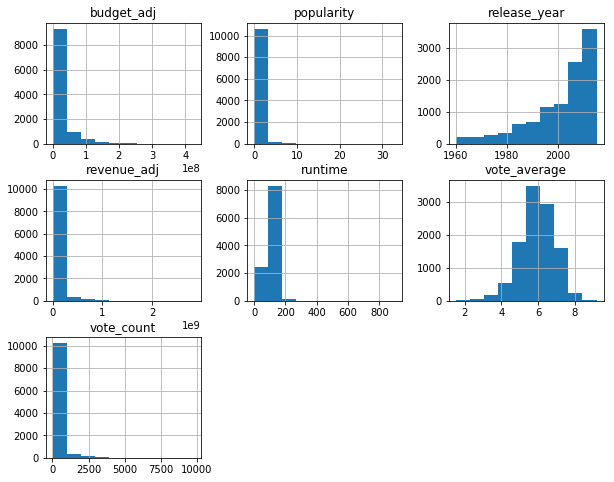

In [15]:
df.hist(figsize=(10,8));

In [24]:
# how many action movies there are  ?
df[df['genres']== 'Action']['genres'].count()

1590

> There is 1590 action movies .... intersting !

Text(0.5,1,'Revenue of each genre compared to the budget')

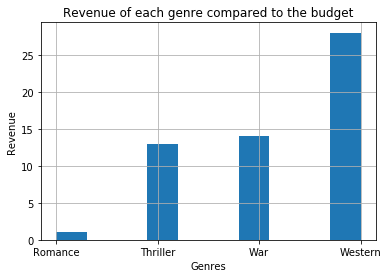

In [30]:
df.groupby('release_year')['genres'].max().hist();
plt.xlabel('Genres')
plt.ylabel('Revenue')
plt.title('Revenue of each genre compared to the budget')

### Research Question 2  (What genre makes the highest revenue compared to the budget)

 > since we will calculate the revenue compared to the budget we will subtract the budget from the revenue and make a new column

In [17]:
df['earnings_adj'] = df['revenue_adj'] - df['budget_adj']

In [18]:
df.head()

,popularity,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,earnings_adj
0,32.985763,124,Action,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,120,Action,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,119,Adventure,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,136,Action,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,137,Action,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


Text(0.5,1,'Revenue of each genre compared to the budget')

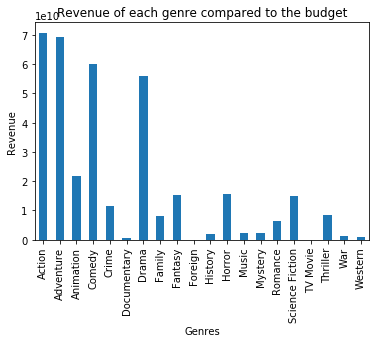

In [29]:
df.groupby('genres')['earnings_adj'].sum().plot(kind='bar');
plt.xlabel('Genres')
plt.ylabel('Revenue')
plt.title('Revenue of each genre compared to the budget')

<a id='conclusions'></a>
## Conclusions

> **So from the analysis we can know that the most common genre is the western followed by war
and the most genre that makes earnings is the action genre followed by adventure**


### Limitations
>**There are some limitation of this project such as chossing only the first genre and neglecting the others. Also there could be a better way to deal with the missing value form genre columns than dropping them**


In [20]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0